# Random Forest Classifier

## Get dataset

In [40]:
from finlab.ml import fundamental_features
dataset = fundamental_features()
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')
dataset.head()

D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\ml.py:49: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  T3900繼續營業部門稅前純益 = T3900繼續營業部門稅前純益[T3900繼續營業部門稅前純益.columns & 收盤價.columns]
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\ml.py:52: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  T3970經常稅後淨利 = T3970經常稅後淨利[T3970經常稅後淨利.columns & 收盤價.columns]
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\ml.py:55: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  T2000權益總計 =  T2000權益總計[T2000權益總計.columns & 收盤價.columns]
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\ml.py:58: FutureWarning: Index.__and__ operating a

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
         2014-08-14     -0.952778      0.152556  ...    5.954576  109.819505   
         2014-11-14     -0.948101      2.168353  ...    5.657634  113.370853   
         2015-03-31     -1.265106      3.002608  ...    5.467505  140.759054   
         2015-05-15     -2.315297      0.069454  ...    2.505042  132.899231   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
         2014-08-14   91.450337  -17.435186   7972516.0      0.112552   
         2014-11-14   93.976558  -17.800651  10552354.0      0.106864   
         2015-03-31  117.966121  -13.169666  27973772.0      0.103034   
         2015-05-15  109.303861   -7.153186  22891238.0      0.073611   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                                                             
1101     2014-05-15    2.191306       0.245688     0.171327    4901868.0  
         2014-08-14    2.381079       0.297377     0.208493   16542181.0  
         2014-11-14    2.306032       0.282283     0.200028    4768224.0  
         2015-03-31    2.268994       0.275197     0.187942  -10525322.0  
         2015-05-15    1.817298       0.195713     0.132250    8494249.0  

[5 rows x 48 columns]

## Add labels

In [41]:
from finlab.data import Data
data = Data()

pe = data.get("本益比")
#ml.add_feature(dataset, '本益比', pe)
dataset.columns

Index(['T3395營業利益', 'T7210營運現金流', 'T3950歸屬母公司淨利', 'T7211折舊', 'T0100流動資產',
       'T1100流動負債', 'T7324取得不動產廠房及設備', 'T3970經常稅後淨利', 'R101_ROA稅後息前',
       'R11V_ROA綜合損益', 'R103_ROE稅後', 'R11U_ROE綜合損益', 'R145_稅前息前折舊前淨利率',
       'R105_營業毛利率', 'R106_營業利益率', 'R107_稅前淨利率', 'R108_稅後淨利率', 'R112_業外收支營收率',
       'R179_貝里比率', 'R203_研究發展費用率', 'R205_現金流量比率', 'R207_稅率', 'R304_每股營業額',
       'R305_每股營業利益', 'R303_每股現金流量', 'R306_每股稅前淨利', 'R314_每股綜合損益',
       'R316_每股稅後淨利', 'R504_總負債除總淨值', 'R505_負債比率', 'R506_淨值除資產', 'R401_營收成長率',
       'R402_營業毛利成長率', 'R403_營業利益成長率', 'R404_稅前淨利成長率', 'R405_稅後淨利成長率',
       'R406_經常利益成長率', 'R408_資產總額成長率', 'R409_淨值成長率', 'R501_流動比率', 'R502_速動比率',
       'R503_利息支出率', 'R678_營運資金', 'R607_總資產週轉次數', 'R610_存貨週轉率',
       'R612_固定資產週轉次數', 'R613_淨值週轉率次', 'R69B_自由現金流量'],
      dtype='object')

In [42]:
rev = data.get("當月營收")
def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def delta_yoy(n):
    return (yoy(n)-yoy(n+1))

#ml.add_feature(dataset, 'delta_yoy', delta_yoy(1))

In [43]:
features = dataset.columns

import finlab.ml as ml

ml.add_profit_prediction(dataset)
dataset = dataset.dropna()
dataset.head()

D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  all_index = (df.index | item.index).sort_values()
D:\Finlab\用 Python 理財：打造自己的 AI 股票理專\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R501_流動比率   R502_速動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  123.837828  101.776758   
         2014-08-14     -0.952778      0.152556  ...  109.819505   91.450337   
         2014-11-14     -0.948101      2.168353  ...  113.370853   93.976558   
         2015-03-31     -1.265106      3.002608  ...  140.759054  117.966121   
         2015-05-15     -2.315297      0.069454  ...  132.899231  109.303861   

                     R503_利息支出率   R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                           
1101     2014-05-15   -9.792979  17732671.0      0.093998    2.191306   
         2014-08-14  -17.435186   7972516.0      0.112552    2.381079   
         2014-11-14  -17.800651  10552354.0      0.106864    2.306032   
         2015-03-31  -13.169666  27973772.0      0.103034    2.268994   
         2015-05-15   -7.153186  22891238.0      0.073611    1.817298   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量    return  
stock_id date                                                           
1101     2014-05-15       0.245688     0.171327    4901868.0  1.073347  
         2014-08-14       0.297377     0.208493   16542181.0  0.984816  
         2014-11-14       0.282283     0.200028    4768224.0  0.969163  
         2015-03-31       0.275197     0.187942  -10525322.0  0.956818  
         2015-05-15       0.195713     0.132250    8494249.0  0.850077  

[5 rows x 49 columns]

## Split Train Test dataset

In [44]:
select = dataset.index.get_level_values('date') < '2017'
dataset_train = dataset[select]
dataset_test = dataset[~select]

## Training

In [45]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(200)
cf.fit(dataset_train[features], dataset_train['return'] > 1)

RandomForestClassifier(n_estimators=200)

## Prediction

In [46]:
import pandas as pd
prediction = cf.predict(dataset_test[features])

## Backtest

<AxesSubplot:xlabel='date'>

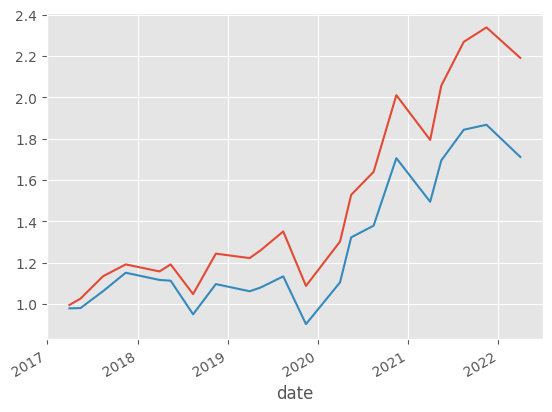

In [47]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

returns1 = dataset_test['return'][prediction == True]
dates = returns1.index.get_level_values('date')
returns1.groupby(dates).mean().cumprod().plot()

returns2 = dataset_test['return'][prediction == False]
dates = returns2.index.get_level_values('date')
returns2.groupby(dates).mean().cumprod().plot()

## Feature Importance

In [48]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance

R409_淨值成長率         0.028080
R408_資產總額成長率       0.027144
R69B_自由現金流量        0.025712
R401_營收成長率         0.024840
R203_研究發展費用率       0.023417
R303_每股現金流量        0.023328
R610_存貨週轉率         0.022964
R112_業外收支營收率       0.022877
R404_稅前淨利成長率       0.022753
T7324取得不動產廠房及設備    0.022462
R205_現金流量比率        0.022291
R402_營業毛利成長率       0.022119
R503_利息支出率         0.022110
R405_稅後淨利成長率       0.021973
R403_營業利益成長率       0.021556
R179_貝里比率          0.021436
T7210營運現金流         0.021229
R105_營業毛利率         0.021136
R406_經常利益成長率       0.021130
R103_ROE稅後         0.021003
R612_固定資產週轉次數      0.020830
R502_速動比率          0.020635
R305_每股營業利益        0.020544
R607_總資產週轉次數       0.020378
T7211折舊            0.020373
R306_每股稅前淨利        0.020154
R11U_ROE綜合損益       0.020065
R145_稅前息前折舊前淨利率    0.019951
R11V_ROA綜合損益       0.019805
R101_ROA稅後息前       0.019764
R106_營業利益率         0.019717
R678_營運資金          0.019375
R501_流動比率          0.019346
T3970經常稅後淨利        0.019290
R207_稅率            0.019237
R613_淨值週轉率次        0

## New Strategy using feature importance

In [49]:
from finlab.data import Data
data = Data()
close = data.get('收盤價')
sma = close.rolling(60, min_periods=10).mean()
bias = close / sma

ml.add_feature(dataset, 'bias', bias)
dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R502_速動比率  R503_利息支出率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  101.776758   -9.792979   
         2014-08-14     -0.952778      0.152556  ...   91.450337  -17.435186   
         2014-11-14     -0.948101      2.168353  ...   93.976558  -17.800651   
         2015-03-31     -1.265106      3.002608  ...  117.966121  -13.169666   
         2015-05-15     -2.315297      0.069454  ...  109.303861   -7.153186   

                      R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  R612_固定資產週轉次數  \
stock_id date                                                              
1101     2014-05-15  17732671.0      0.093998    2.191306       0.245688   
         2014-08-14   7972516.0      0.112552    2.381079       0.297377   
         2014-11-14  10552354.0      0.106864    2.306032       0.282283   
         2015-03-31  27973772.0      0.103034    2.268994       0.275197   
         2015-05-15  22891238.0      0.073611    1.817298       0.195713   

                     R613_淨值週轉率次  R69B_自由現金流量    return      bias  
stock_id date                                                      
1101     2014-05-15     0.171327    4901868.0  1.073347  0.960967  
         2014-08-14     0.208493   16542181.0  0.984816  1.021982  
         2014-11-14     0.200028    4768224.0  0.969163  0.971380  
         2015-03-31     0.187942  -10525322.0  0.956818  1.040769  
         2015-05-15     0.132250    8494249.0  0.850077  0.988372  

[5 rows x 50 columns]

<AxesSubplot:xlabel='date'>

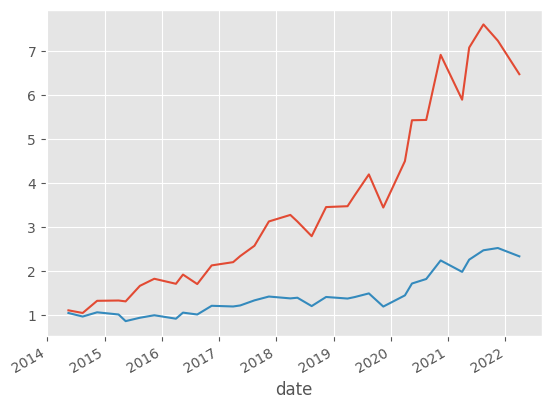

In [50]:
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct=True).sum(axis=1)
    return df[rank > rank.quantile(0.9)]['return'][df['bias'] > 1].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()